# INFO 7390 <br>
# Advances in Data Sciences and Architecture!<br>
## Exam 1

### Student Name: Zihan Zhang<br>
### Professor: Nik Bear Brown

### Q1

#### The stock market is often modeled as a normal distribution; but is closer to a Weibull distribution. How does a normal distribution differ from a Weibull distribution?

They are two totally different distributions. Weibull distribution is a generalization of the exponential distribution but Normal distribution is not. The shape of Weibull distribution in probability-density graph changes considerably with different parameters but normal distribution will not change.

#### Plot a normal distribution with mean 700 and standard deviation 100. What is the probability of a value being greater than 900?

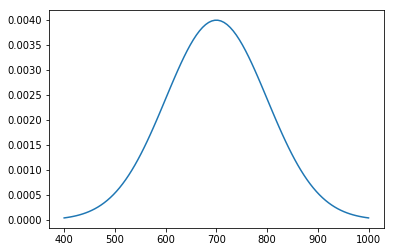

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

mu = 700
sigma = 100
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

In [6]:
import scipy.stats

scipy.stats.norm(700, 100).pdf(900)

0.0005399096651318807

#### Use a 2-parameter Weibull distribution to approximate a normal distribution (i.e. find a shape
#### parameter that has a “bell shape” and a scale parameter to is close the normal above.)
#### See
#### https://www.johndcook.com/blog/distributions_scipy/
#### http://www.niar.wichita.edu/coe/NCAMP_Documents/Publications/NCAMP_Techincal_Presentations/Distribution_for_small_sample_sizes_and_fatigue_data.pdf
#### https://stackoverflow.com/questions/17481672/fitting-a-weibull-distribution-using-scipy
#### http://faculty.washington.edu/fscholz/DATAFILES498B2008/WeibullBounds.pdf
#### Plot a normal distribution with mean 700 and standard deviation 100 in the same graph as its Weibull approximation. What is the probability of a value being greater than 900 using the Weibull approximation?

(1, 0.18683883091259712, 4.431848411938006e-05, 0.8621497212342559)
1.948941553988356e-05


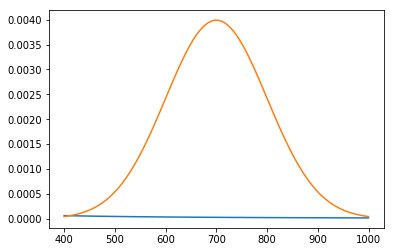

In [221]:
%matplotlib inline

from scipy import stats
import matplotlib.pyplot as plt

mu = 700
sigma = 100
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = mlab.normpdf(x, mu, sigma)

weibull_params = stats.exponweib.fit(y, loc=0, f0=1)

print(weibull_params)

plt.plot(x, stats.exponweib.pdf(x, 1, weibull_params[1], scale = weibull_params[3]))
plt.plot(x, y)

print(stats.exponweib.pdf(900, 1, weibull_params[1], scale = weibull_params[3]))

But as you can see, the result of using fit method is not satisfying. By manually adjust the parameters, I think a = 1, c = 7.5, lamda = 700 is fitting better.

7.575135896737437e-05


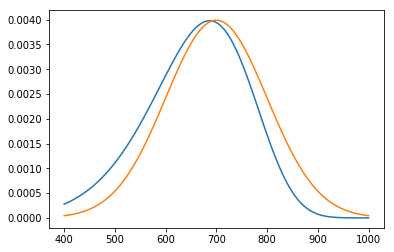

In [223]:
plt.plot(x, stats.exponweib.pdf(x, 1, 7.5, scale = 700))
plt.plot(x, y)
print(stats.exponweib.pdf(900, 1, 7.5, scale = 700))

### Q2

#### What is a hypothesis test? What is meant by the null hypothesis and alternative hypothesis?

Hypothesis testing is a method to evaluate the two exclusive statement based on sample data.<br>
Null hypothesis is the hypothesis that we are not going to observe the event to happen in the experiment.<br>
Alternative hypothesis is in the opposite the hypothesis that we are going to observe the event.

#### How does a z-test differ from a t-test?

t-test should have a small sample size<br>
z-test should have a large sample size <br>
t-test standard deviation unknown<br>
z-test standard deviation known<br>

#### Create an example problem using a hypothesis test. It MUST use data that you used in assignment 1, 2 or 3.

In [121]:
data = [23.72502353842273, 21.62401646603374, -0.7463274288122257, 1.7178830450828002, -2.634776050958738,
        -2.792138753758266, -10.514395560878746, 8.720529920419578, 18.782813772780308, 5.825456165455785, 
        11.172228117978728, 11.97032962928146, -30.981624884074883, 8.428109006257554, 13.715597227579686, 
        -7.14438096845215, 35.38150590002323, 5.951675701660346, -2.128337264991565, 12.952160066221724, 
        -9.52841782146271, 9.27768703224383, -10.489029625059331, 1.7170477394203232, 11.717280979491225, 
        18.84977052950971, 12.645227894971965, -2.444524930791145, -4.870684454119193, 9.384408019477661,
        13.450953108385315, 23.714466213916317, 5.7140681189301255, -14.73667486810843, 6.455693762385872, 
        9.715370033540502, 11.133859293104898, 5.12584305942378, -3.6547977197096486, 15.65791149754521,
        17.045514919166266, 20.86418259486488, 28.498593533062984, 15.689734619702122, 7.954721816163218,
        -3.113512775937407, 12.86046371264133, 2.467429173851536, -2.682786932363779, -1.9362359856511269, 
        5.912048015521583, 24.003261208189425, 9.7084789611135, -6.91532401310932, 21.426117689357]

Null Hypothesis: Less than 50% of the tech stocks go up<br>
Alternative Hypothesis: More than 50% of the tech stocks go up

#### Show how to solve the problem with hand calculations.

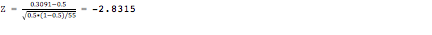<br>
According to z distribution table, Null Hypothesis is rejected with alpha = 0.05

#### Show how to solve the problem with python code.

In [123]:
up = 0
down = 0
for i in data:
    if i > 0:
        up = up + 1
    else:
        down = down + 1
print("up: " + str(up))
print("down: " + str(down))

up: 38
down: 17


In [124]:
17 / (38 + 17)

0.3090909090909091

In [125]:
(0.3091 - 0.5)/ pow(0.5 * 0.5 /55, 1/2)

-2.831504582373124

In [127]:
import math
(0.3091 - 0.5) / math.sqrt(0.5 * 0.5 / 55)

-2.831504582373124

up: 38
down: 17
z value: -2.831504582373124


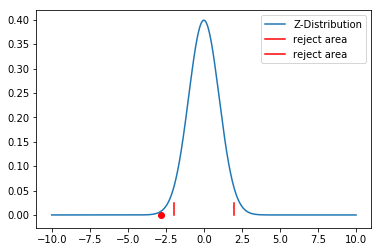

In [142]:
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm


data = [23.72502353842273, 21.62401646603374, -0.7463274288122257, 1.7178830450828002, -2.634776050958738,
        -2.792138753758266, -10.514395560878746, 8.720529920419578, 18.782813772780308, 5.825456165455785, 
        11.172228117978728, 11.97032962928146, -30.981624884074883, 8.428109006257554, 13.715597227579686, 
        -7.14438096845215, 35.38150590002323, 5.951675701660346, -2.128337264991565, 12.952160066221724, 
        -9.52841782146271, 9.27768703224383, -10.489029625059331, 1.7170477394203232, 11.717280979491225, 
        18.84977052950971, 12.645227894971965, -2.444524930791145, -4.870684454119193, 9.384408019477661,
        13.450953108385315, 23.714466213916317, 5.7140681189301255, -14.73667486810843, 6.455693762385872, 
        9.715370033540502, 11.133859293104898, 5.12584305942378, -3.6547977197096486, 15.65791149754521,
        17.045514919166266, 20.86418259486488, 28.498593533062984, 15.689734619702122, 7.954721816163218,
        -3.113512775937407, 12.86046371264133, 2.467429173851536, -2.682786932363779, -1.9362359856511269, 
        5.912048015521583, 24.003261208189425, 9.7084789611135, -6.91532401310932, 21.426117689357]

n = len(data)
h0 = 10
alpha = 0.05

up = 0
down = 0
for i in data:
    if i > 0:
        up = up + 1
    else:
        down = down + 1
print("up: " + str(up))
print("down: " + str(down))


zscore = (0.3091 - 0.5) / math.sqrt(0.5 * 0.5 / 55)

print("z value: " + str(zscore))

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, norm.pdf(xs), label="Z-Distribution")

critline = np.linspace(0,alpha/2)
zcrit = abs(norm.ppf(alpha/2))
xs_1 = len(critline) * [-zcrit]
xs_2 = len(critline) * [zcrit]

plt.scatter(zscore, 0, c='r', )

plt.plot(xs_1, critline, 'r', label="reject area")
plt.plot(xs_2, critline,'r', label="reject area")
plt.plot()
plt.plot()
plt.legend()
plt.show()

### Q3

#### Write an equation for linear regression. Explain how the error is dependent on either the dependent variables? What is the distribution of the error?

In [227]:
from sklearn import datasets, linear_model

price = datasets.load_boston()
regr = linear_model.LinearRegression()
y = price.target
x = price.data
regr.fit(x, y)

varis = regr.coef_
varname = price['feature_names']
inter = regr.intercept_

equation = "Price = "
for i in range(12):
    equation = equation + str(varis[i]) + "*" + varname[i] + " + " 
equation = equation + str(inter)
print(equation)

Price = -0.10717055656035566*CRIM + 0.046395219529801954*ZN + 0.02086023953217235*INDUS + 2.6885613993179542*CHAS + -17.79575866030896*NOX + 3.804752460258008*RM + 0.000751061703319067*AGE + -1.4757587965198167*DIS + 0.30565503833909946*RAD + -0.01232934630527538*TAX + -0.9534635546905583*PTRATIO + 0.009392512722190105*B + 36.491103280363134


#### How does generalized linear model (GLM) relate to ordinary linear regression?

A generalized linear model is a flexible generalization of ordinary linear regression models which allows for the response variables (dependent) to have error distribution other than normal distribution. It generalizes linear regression by allowing the linear model to be related to the response variable via a link function and by allowing the magnitude of the variance of each measurement to be a function of its predicted value. GLM was developed to unify other statistical methods (linear, logistic, Poisson regression). Popular approach used here is of maximum likelihood.

#### What is the relationship between the linear predictor(s) and the mean of the response distribution function if one models ordinary linear regression as a GLM?

They are linear because the covariates affect the distribution of yi only through the linear combination xb.

#### Linear regression assumes that the error of the dependent variable is normally distributed. What would one do if it is not?

OLR cannot be used because it requires error to be normally distributed. Instead, GLM can be used

#### Use a GLM to create generalized linear model assuming the error of the dependent variable is normally distributed on the same data that you used in the linear regression assignment. How does it compare to the results in the linear regression assignment?

In [154]:
import pandas as pd
csv = pd.read_csv('./PUBG_Player_Statistics.csv')
xs = csv[['duo_KillDeathRatio']]
ys = csv[['squad_KillDeathRatio']]
model = linear_model.LinearRegression()
result = model.fit(xs, ys)
print (result.intercept_, result.coef_)

[0.72803658] [[0.45923726]]


In [155]:
from sklearn import linear_model
import pandas as pd
csv = pd.read_csv('./PUBG_Player_Statistics.csv')
xs = csv[['duo_KillDeathRatio']]
ys = csv[['squad_KillDeathRatio']]
reg = linear_model.Ridge (alpha = .5)
reg.fit (xs, ys) 
reg.coef_
reg.intercept_ 

array([0.72803868])

They are almost the same

#### Relationship between the dependent and independent variables need not be of the simple linear form. What would one do if it is not?

Do data transform to make the linear relationship not significant.

#### What is regularization? Why does one use it? Can it be used with a GLM?

regularization is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting. It can be used with GLM.

### Q4

#### Consider the supervised learning algorithms support vector machines, random forests and multilayer perceptrons. What are hyper-parameters?

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

#### What are the hyper-parameters for the algorithms: 1) support vector machines, 2) random forests and 3) multilayer perceptrons?

Support vector machines: C<br>
Random forests: max_depth, max_features, min_samples_split, min_samples_leaf, bootstrap, criterion<br>
Multilayer perceptrons: n_estimators, learning_rate, max_depth, min_samples_leaf, max_features

#### Using data, write python code to show the effect of hyper-parameters on each of these algorithms.

SVM(Using GridSearchCV):

In [188]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

digits = datasets.load_digits()

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Automatically created module for IPython interactive environment
0.986 (+/-0.021) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.958 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.029) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.021) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.027) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.021) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.027) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.973 (+/-0.015) for {'C': 1, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 10, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 100, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 1000, 'kernel': 'linear'}


SVM(Traverse):

In [191]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

for C in [1, 10, 100, 1000]:
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

    X_train.shape, y_train.shape
    X_test.shape, y_test.shape

    clf = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
    print(clf.score(X_test, y_test)  

0.9666666666666667
0.9
0.95
0.9666666666666667


Random Forest:

In [197]:
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target

clf = RandomForestClassifier(n_estimators=20)

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(X, y)

report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.932 (std: 0.019)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.931 (std: 0.010)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.929 (std: 0.011)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}



Multilayer Perceptrons:

In [206]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

boston=load_boston()
x=boston.data
y=boston.target
  
train_x_disorder, test_x_disorder, train_y_disorder, test_y_disorder = train_test_split(x, y,
                                                                    train_size=0.8, random_state=33)
ss_x = preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(train_x_disorder)
test_x_disorder = ss_x.transform(test_x_disorder)
 
ss_y = preprocessing.StandardScaler()
train_y_disorder = ss_y.fit_transform(train_y_disorder.reshape(-1, 1))
test_y_disorder=ss_y.transform(test_y_disorder.reshape(-1, 1))
 
model_mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(20, 20, 20), random_state=1)
model_mlp.fit(train_x_disorder,train_y_disorder.ravel())
mlp_score=model_mlp.score(test_x_disorder,test_y_disorder.ravel())
 
 
model_gbr_disorder=GradientBoostingRegressor()
model_gbr_disorder.fit(train_x_disorder,train_y_disorder.ravel())
gbr_score_disorder=model_gbr_disorder.score(test_x_disorder,test_y_disorder.ravel())
 
model_gbr_GridSearch=GradientBoostingRegressor()
param_grid = {'n_estimators':range(20,81,10),
              'learning_rate': [0.2,0.1, 0.05, 0.02, 0.01 ],
              'max_depth': [4, 6,8],
              'min_samples_leaf': [3, 5, 9, 14],
              'max_features': [0.8,0.5,0.3, 0.1]}
from sklearn.model_selection import GridSearchCV
estimator = GridSearchCV(model_gbr_GridSearch,param_grid )
estimator.fit(train_x_disorder,train_y_disorder.ravel() )
report(estimator.cv_results_)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model with rank: 1
Mean validation score: 0.898 (std: 0.010)
Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 3, 'n_estimators': 60}

Model with rank: 2
Mean validation score: 0.898 (std: 0.005)
Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 3, 'n_estimators': 40}

Model with rank: 3
Mean validation score: 0.897 (std: 0.007)
Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 3, 'n_estimators': 50}



### Q5

#### What is the difference between bagging, boosting and stacking?

<li>Bagging aims to decrease variance, bootstrap subsets of features and samples to get the results. Bagging work parallely.<br>
<li>Boosting aims to decrease bias, learn mainly the error from previous one. Boosting Work Sequentially.<br>
<li>stacking is summarizing results from multiple algorithms not like other two using single algorithm, usually result in higher accuracy of prediction

#### In python, show an example of bagging, boosting and stacking.

Boosting

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()   

0.9599673202614379

Bagging

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Stacking

In [215]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))


lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

stregr.fit(X, y)
stregr.predict(X)

print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score: %.4f' % stregr.score(X, y))

Mean Squared Error: 0.2039
Variance Score: 0.7049


#### Do gradient-boosted trees, and random forests use bagging, boosting or stacking?

Gradient-boosted trees: Boosting<br>
Random forests: Bagging

#### If so, how do gradient-boosted trees differ from random forests?

<li>GBM is a boosting method, which builds on weak classifiers. The idea is to add a classifier at a time, so that the next classifier is trained to improve the already trained ensemble. Notice that for RF each iteration the classifier is trained independently from the rest.
<li>RF uses decision trees, which are very prone to overfitting. In order to achieve higher accuracy, RF decides to create a large number of them based on bagging. The basic idea is to resample the data over and over and for each sample train a new classifier. Different classifiers overfit the data in a different way, and through voting those differences are averaged out.

#### Create a meta-algorithm to implement a stacked ensemble super-learner in python. It must use at least three base learners.

In [220]:
train=[
       [0.624,0.583],[0.321,0.016],[0.095,0.285],[0.235,0.573],[0.027,0.146],[0.514,0.06],[0.612,0.083],[0.054,0.597],
       [0.344,0.108],[0.671,0.089],[0.486,0.583],[0.829,0.929],[0.451,0.018],[0.448,0.286],[0.26,0.914],[0.893,0.706],
       [0.951,0.487],[0.811,0.075],[0.65,0.505],[0.902,0.24],[0.312,0.617],[0.907,0.844],[0.629,0.194],[0.333,0.559],
       [0.98,0.983],[0.87,0.706],[0.611,0.623],[0.463,0.097],[0.957,0.507],[0.341,0.792],[0.384,0.482],[0.584,0.655],
       [0.446,0.454],[0.314,0.396],[0.061,0.712],[0.951,0.691],[0.71,0.444],[0.238,0.809],[0.943,0.874],[0.325,0.619],
       [0.438,0.146],[0.131,0.055],[0.884,0.083],[0.306,0.641],[0.071,0.32],[0.765,0.402],[0.321,0.584],[0.714,0.444],
       [0.533,0.811],[0.644,0.293],[0.403,0.579],[0.278,0.577],[0.888,0.902],[0.99,0.182],[0.212,0.072],[0.692,0.386],
       [0.919,0.318],[0.082,0.234],[0.99,0.597],[0.867,0.371],[0.158,0.154],[0.304,0.826],[0.088,0.638],[0.382,0.87],
       [0.491,0.75],[0.155,0.731],[0.291,0.494],[0.76,0.304],[0.602,0.904],[0.512,0.713],[0.28,0.626],[0.99,0.566],
       [0.26,0.613],[0.312,0.561],[0.84,0.695],[0.112,0.245],[0.701,0.479],[0.974,0.103],[0.507,0.188],[0.583,0.586],
       [0.965,0.96],[0.112,0.007],[0.018,0.752],[0.063,0.967],[0.456,0.024],[0.214,0.107],[0.086,0.352],[0.892,0.356],
       [0.533,0.533],[0.276,0.241],[0.514,0.363],[0.241,0.765],[0.829,0.821],[0.73,0.54],[0.136,0.635],[0.431,0.248],
       [0.288,0.259],[0.008,0.663],[0.856,0.954],[0.579,0.972]
       ]
y=[19.444,4.992,2.11,13.708,0.805,8.619,10.21,11.443,5.624,11.092,17.783,19.544,7.135,7.411,10.633,19.133,23.157,
   12.794,18.729,14.939,9.564,19.852,10.028,14.571,22.387,18.742,14.089,8.017,23.241,11.613,14.473,13.893,15.127,
   12.062,5.968,19.842,18.636,9.556,21.748,9.319,7.09,2.423,14.594,9.14,6.539,18.883,15.257,18.729,14.114,10.36,
   16.359,14.56,19.991,15.411,3.763,17.696,19.243,1.937,26.017,19.858,2.971,10.657,5.808,11.943,13.442,7.663,
   13.304,17.375,15.677,13.589,8.728,25.399,8.824,14.796,18.179,2.405,19.424,15.835,8.254,19.661,21.516,1.764,
   5.845,8.68,7.262,3.478,7.544,19.942,17.491,4.847,14.444,9.097,18.873,20.894,7.049,7.103,5.038,5.026,20.896,16.037]

test=[
      [0.463,0.496],[0.45,0.365],[0.131,0.283],[0.015,0.827],[0.076,0.302],[0.092,0.356],[0.765,0.039],[0.94,0.767],[0.413,0.343],
      [0.484,0.155],[0.464,0.695],[0.574,0.767],[0.81,0.848],[0.888,0.317],[0.802,0.776],[0.197,0.417],[0.076,0.9],[0.071,0.248],
      [0.377,0.356],[0.523,0.538],[0.282,0.151],[0.299,0.342],[0.171,0.879],[0.125,0.123],[0.38,0.554],[0.138,0.919],[0.984,0.361],
      [0.07,0.95],[0.674,0.511],[0.514,0.808],[0.808,0.83],[0.573,0.622],[0.719,0.961],[0.479,0.144],[0.158,0.708],[0.365,0.306],
      [0.704,0.963],[0.959,0.614],[0.36,0.8],[0.937,0.178],[0.412,0.69],[0.145,0.122],[0.386,0.832],[0.419,0.622],[0.908,0.44],
      [0.139,0.227],[0.57,0.852],[0.322,0.763],[0.407,0.94],[0.972,0.735],[0.027,0.671],[0.875,0.533],[0.117,0.829],[0.837,0.725],
      [0.963,0.674],[0.065,0.641],[0.271,0.693],[0.845,0.423],[0.332,0.341],[0.548,0.883],[0.979,0.094],[0.806,0.249],[0.924,0.513],
      [0.564,0.971],[0.768,0.098],[0.258,0.096],[0.365,0.811],[0.241,0.83],[0.636,0.481],[0.583,0.037],[0.408,0.535],[0.147,0.737],
      [0.027,0.452],[0.871,0.599],[0.774,0.614],[0.563,0.268],[0.573,0.424],[0.902,0.863],[0.274,0.253],[0.312,0.135],[0.435,0.416],
      [0.973,0.094],[0.541,0.022],[0.501,0.773],[0.18,0.936],[0.253,0.042],[0.354,0.242],[0.268,0.671],[0.253,0.382],[0.488,0.956],
      [0.081,0.715],[0.786,0.647],[0.813,0.999],[0.967,0.846],[0.3,0.26],[0.06,0.658],[0.366,0.988],[0.397,0.978],[0.535,0.935]
      ]


ytest=[15.828,13.165,2.805,6.464,6.338,7.868,11.866,19.99,12.631,7.707,12.534,14.495,19.236,19.504,17.825,10.311,7.744,1.643,12.255,
       17.601,4.874,10.789,9.428,2.327,15.502,8.762,21.087,8.585,19.251,13.568,19.096,13.478,18.991,7.625,7.578,10.835,18.129,19.543,
       11.518,15.077,11.418,2.585,12.003,11.192,22.111,2.727,15.859,10.681,13.344,20.361,5.576,23.465,8.48,18.288,20.473,5.871,9.61,
       19.963,10.884,15.108,15.787,13.071,23.744,16.452,12.334,4.794,11.67,9.674,18.095,9.58,15.796,7.597,8.211,24.461,16.518,9.306,
       16.248,20.532,4.874,5.217,14.104,15.786,8.479,13.659,9.66,4.149,6.156,9.4,10.784,14.966,6.84,16.894,19.311,21.661,5.455,
       6.063,13.329,13.911,15.998]

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


training,valid,ytraining,yvalid = train_test_split(
        train,y,test_size=0.5,random_state=2)

model1=RandomForestRegressor(random_state=2)
model2=LinearRegression()
model3=SVR()

model1.fit(training,ytraining)
model2.fit(training,ytraining)
model3.fit(training,ytraining)


preds1=model1.predict(valid)
preds2=model2.predict(valid)
preds3=model3.predict(valid)

test_preds1=model1.predict(test)
test_preds2=model2.predict(test)
test_preds3=model3.predict(test)

stacked_predictions=np.column_stack((preds1,preds2, preds3))
stacked_test_predictions=np.column_stack((test_preds1,test_preds2, test_preds3))

meta_model=LinearRegression()

meta_model.fit(stacked_predictions,yvalid)

final_predictions=meta_model.predict(stacked_test_predictions)

print ("mean squared error of model 1 ", mean_squared_error(ytest,test_preds1)) 
print ("mean squared error of model 2 ", mean_squared_error(ytest,test_preds2)) 
print ("mean squared error of meta model ", mean_squared_error(ytest,final_predictions)) 

mean squared error of model 1  3.236815682424245
mean squared error of model 2  4.511135759851835
mean squared error of meta model  2.5737817188397925


#### Did your super-learner help?

Yes, it significantly reduce the mean squared error

### Cites

<li>https://www.quora.com/What-is-the-difference-between-general-linear-models-and-generalized-linear-models
<li>https://stats.stackexchange.com/questions/29731/regression-when-the-ols-residuals-are-not-normally-distributed
<li>https://www.ricequant.com/community/topic/778//2
<li>https://en.wikipedia.org/wiki/Regularization_(mathematics)
<li>https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/
<li>https://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning
<li>https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/
<li>https://stats.stackexchange.com/questions/173390/gradient-boosting-tree-vs-random-forest
<li>https://www.coursera.org/lecture/competitive-data-science/stacking-Qdtt6?authMode=signup